# Bank-Full ML

Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

Number of Instances: 45211 for bank-full.csv

Number of Attributes: 16 + output attribute.

# Target

Find and define correlation between variable to client subscription 

# Feature Description

# Bank-Full
Data taken from :(https://drive.google.com/file/d/10L6Lw0RWC-8qas76rJNj4Y11WQShsXUp/view?usp=sharing)

In this case study, a loan from bank dataset became the target feature to analyze and predict sccording to other variables, both categorical and numerica. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

Number of Instances: 45211 for bank-full.csv

Number of Attributes: 16 + output attribute.

Target <br>
Find The Correlation between features and loan subscribtion

## Feature Description

The data is related with direct marketing campaigns of a Portuguese banking institution. <br>
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, <br>
in order to access if the product (bank term deposit) would be (or not) subscribed. <br>

Number of Instances: 45211 for bank-full.csv<br>
Number of Attributes: 16 + output attribute.

## Attribute information

### Input variables:
bank client data:
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                        "blue-collar","self-employed","retired","technician","services")                                  
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
     related with the last contact of the current campaign:
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
     other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

   Output variable (desired target):
   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Challenges:
> imbalanced data, the yes and no data from subscription have a ratio yes:no of 1:10 
> Some data features were not relevant
> multicollinearity


# Data Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import random

import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

# for undersampling & oversampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\RIzkyeka00\Downloads\bank-full.csv', delimiter =';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# mengecek unique features
unfe = []
for i in df.columns:
    unfe.append([i, df[i].nunique(), df[i].drop_duplicates().values])

unique = pd.DataFrame(unfe,columns=["Features", "Unique Number", "Values"])
unique

,Features,Unique Number,Values
0,age,77,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5..."
1,job,12,"[management, technician, entrepreneur, blue-co..."
2,marital,3,"[married, single, divorced]"
3,education,4,"[tertiary, secondary, unknown, primary]"
4,default,2,"[no, yes]"
5,balance,7168,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270..."
6,housing,2,"[yes, no]"
7,loan,2,"[no, yes]"
8,contact,3,"[unknown, cellular, telephone]"
9,day,31,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21..."


In [9]:
df = df.drop([ 'day', 'month', 'pdays', 'contact', 'duration','previous', 'poutcome'],axis=1)

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,1,no
1,44,technician,single,secondary,no,29,yes,no,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,no
4,33,unknown,single,unknown,no,1,no,no,1,no


In [11]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,campaign,y
45206,51,technician,married,tertiary,no,825,no,no,3,yes
45207,71,retired,divorced,primary,no,1729,no,no,2,yes
45208,72,retired,married,secondary,no,5715,no,no,5,yes
45209,57,blue-collar,married,secondary,no,668,no,no,4,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,2,no


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   campaign   45211 non-null  int64 
 9   y          45211 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


## Data Preprocessing

### missing value handling

In [14]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
campaign     0
y            0
dtype: int64

there is no  missing value

### Checking & Handling Outliers

In [15]:
def find_outlier(data):
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    IQR = Q3-Q1
    min_IQR = Q1-1.5*IQR
    max_IQR = Q3+1.5*IQR
    
    low_out =[]
    upper_out = []
    
    for i in data:
        if(i<min_IQR):
            low_out.append(i)
        if (i > max_IQR):
            upper_out.append(i)
    return low_out, upper_out

In [16]:
lower_out = [find_outlier(df[i])[0] for i in df.columns[df.dtypes != object]]
upper_out = [find_outlier(df[i])[1] for i in df.columns[df.dtypes != object]]

outlier = pd.DataFrame({
    "Jumlah Outlier":[len(i) + len(j) for i,j in zip(lower_out,upper_out)],
    "Persentase Outlier":[(len(i) + len(j)) / len(df) * 100 for i,j in zip(lower_out,upper_out)]
}).set_index(df.columns[df.dtypes != object]).sort_values("Jumlah Outlier",ascending=False)
outlier

,Jumlah Outlier,Persentase Outlier
balance,4729,10.459844
campaign,3064,6.777112
age,487,1.077171


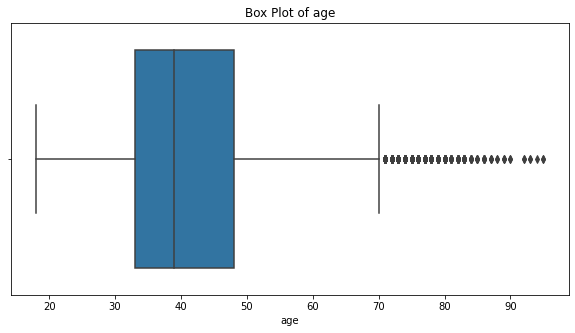

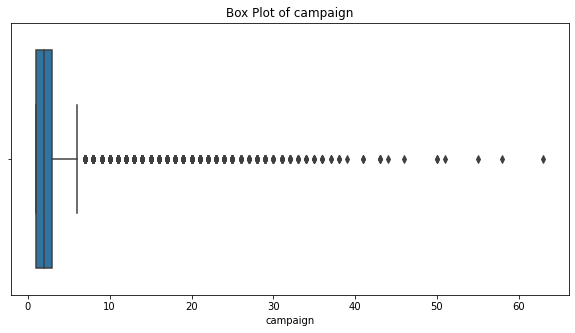

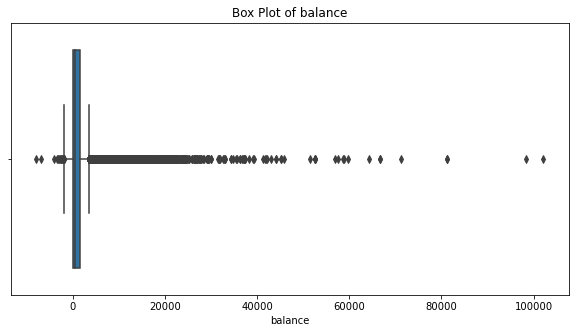

In [17]:
for i in df[['age', 'campaign', 'balance']]:   
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,x=df[i])
    plt.title(f"Box Plot of {i}")
plt.show()

In [18]:
# Find outlier using IQR
def outliers(df_new):
    Q1 = np.quantile(df_new, .25)
    Q3 = np.quantile(df_new, .75)
    #
    IQR = Q3-Q1
    min_IQR = Q1-1.5*IQR
    max_IQR = Q3+1.5*IQR
    #
    low_out =[]
    upper_out = []
    #
    for i in df_new:
        if(i<min_IQR):
            low_out.append(i)
        if (i > max_IQR):
            upper_out.append(i)
    return low_out, upper_out

In [19]:
df_new = df.copy()
outlier_dict = {}
for i in df_new:
     if (df_new[i].dtypes == 'int64'): 
        lower_out = outliers(df_new[i])[0]
        upper_out = outliers(df_new[i])[1]
        outlier_dict[i] = (lower_out, upper_out)

In [20]:
df_new = df.copy()
for i in df_new[['age', 'balance', 'campaign']]:
    if (df_new[i].dtypes == 'int64'):
        threshold = min(outlier_dict[i][1])
        df_new = df_new[df_new[i]< threshold]

In [21]:
### df_new overview

In [22]:
df_new.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,1,no
1,44,technician,single,secondary,no,29,yes,no,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,no
4,33,unknown,single,unknown,no,1,no,no,1,no


In [23]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37368.0,40.263220,9.937012,18.0,32.0,39.0,48.0,70.0
balance,37368.0,638.569230,846.984206,-8019.0,47.0,350.0,979.0,3462.0
campaign,37368.0,2.134928,1.317559,1.0,1.0,2.0,3.0,6.0


In [24]:
df_new['y'].value_counts()

no     33142
yes     4226
Name: y, dtype: int64

In [25]:
df_new['education'].value_counts()

secondary    19737
tertiary     10600
primary       5564
unknown       1467
Name: education, dtype: int64

In [26]:
df_new.to_csv('Bank_ready.csv', index = False)

## Feature Engineering

### Scaling

In [27]:
#import lib
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()

In [28]:
df1=df_new.copy()

In [29]:
for i in df1:
    if (df_new[i].dtypes == 'int64'):
        df1[i]=scaler.fit_transform(df1[[i]])

In [30]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,0.769231,management,married,tertiary,no,0.885115,yes,no,0.0,no
1,0.500000,technician,single,secondary,no,0.700984,yes,no,0.0,no
2,0.288462,entrepreneur,married,secondary,no,0.698633,yes,yes,0.0,no
3,0.557692,blue-collar,married,unknown,no,0.829632,yes,no,0.0,no
4,0.288462,unknown,single,unknown,no,0.698545,no,no,0.0,no


### Encoding

In [31]:
# import library untuk encoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [32]:
# contoh dengan ordinal encoder, gunakan fit_transform untuk encode data
df_enc = df1.copy()
#education ordinal encoding with unknown class
edu_order=['tertiary', 'secondary', 'primary', 'unknown']
df_enc["education"] = OrdinalEncoder(categories=[edu_order]).fit_transform(df_enc[["education"]])

In [33]:
marital_order=['single', 'divorced', 'married']
df_enc["marital"] = OrdinalEncoder(categories=[marital_order]).fit_transform(df_enc[["marital"]])

In [34]:
df_enc.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,0.769231,management,2.0,0.0,no,0.885115,yes,no,0.0,no
1,0.500000,technician,0.0,1.0,no,0.700984,yes,no,0.0,no
2,0.288462,entrepreneur,2.0,1.0,no,0.698633,yes,yes,0.0,no
3,0.557692,blue-collar,2.0,3.0,no,0.829632,yes,no,0.0,no
4,0.288462,unknown,0.0,3.0,no,0.698545,no,no,0.0,no


In [35]:
# gunakan drop first
df_enc = pd.get_dummies(df_enc, prefix='housing', columns=['housing'], drop_first = True)
df_enc = pd.get_dummies(df_enc, prefix='default', columns=['default'], drop_first = True)
df_enc = pd.get_dummies(df_enc, prefix='loan', columns=['loan'], drop_first = True)
df_enc = pd.get_dummies(df_enc, prefix='y', columns=['y'], drop_first = True)
df_enc = pd.get_dummies(df_enc, prefix='j', columns=['job'], drop_first = True)

In [36]:
df_enc.head()

,age,marital,education,balance,campaign,housing_yes,default_yes,loan_yes,y_yes,j_blue-collar,j_entrepreneur,j_housemaid,j_management,j_retired,j_self-employed,j_services,j_student,j_technician,j_unemployed,j_unknown
0,0.769231,2.0,0.0,0.885115,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.500000,0.0,1.0,0.700984,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.288462,2.0,1.0,0.698633,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0.557692,2.0,3.0,0.829632,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.288462,0.0,3.0,0.698545,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

In [38]:
X = df_enc.drop(columns=["y_yes"])
y = df_enc["y_yes"]

In [39]:
anov = SelectKBest(score_func = f_classif)
fit = anov.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [40]:
#  concat kedua dataframes
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score'] # memberi nama dataframe columns
featureScores.nlargest(10, 'Score') # print top 10 features

,Specs,Score
5,housing_yes,697.992479
3,balance,286.229974
15,j_student,255.381986
1,marital,209.318708
8,j_blue-collar,172.120405
7,loan_yes,154.197728
2,education,152.227412
4,campaign,150.383626
12,j_retired,63.253565
11,j_management,48.234069


#### Filter Method with Heatmap

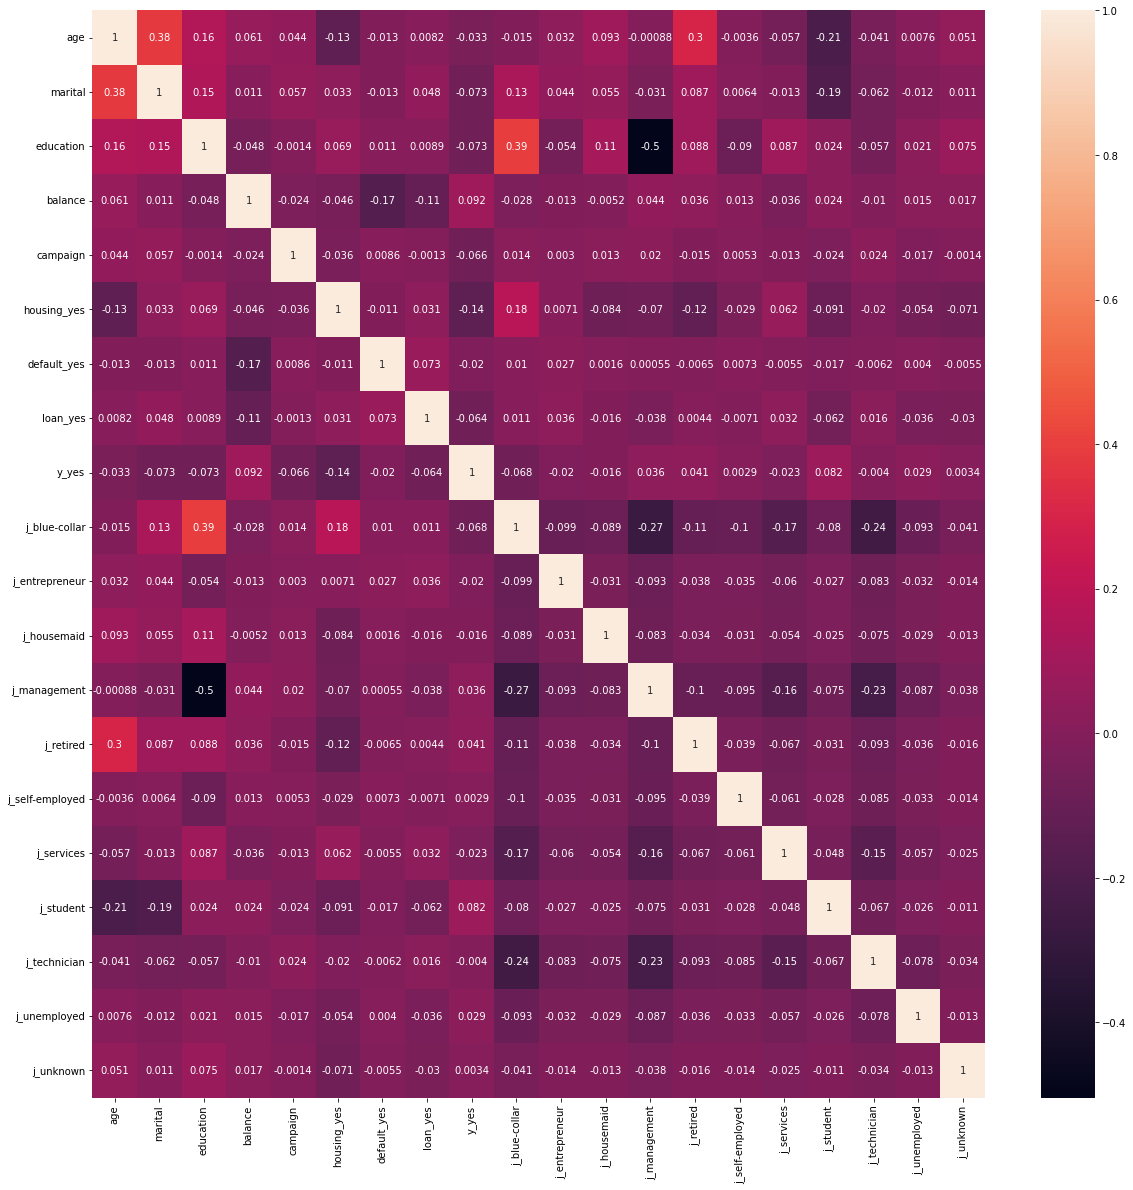

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df_enc.corr("spearman"), annot=True)
plt.show()

In [42]:
model = ExtraTreesClassifier() 
model.fit(X,y) 
print(model.feature_importances_)

[0.30704516 0.0203146  0.03574984 0.49344749 0.06269363 0.02088617
 0.00358462 0.00977434 0.00489512 0.00336617 0.00292561 0.00522701
 0.00318202 0.00411058 0.00487337 0.00595739 0.00657152 0.00362779
 0.00176758]


In [43]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12)

balance          0.493447
age              0.307045
campaign         0.062694
education        0.035750
housing_yes      0.020886
marital          0.020315
loan_yes         0.009774
j_technician     0.006572
j_student        0.005957
j_management     0.005227
j_blue-collar    0.004895
j_services       0.004873
dtype: float64

In [44]:
col = feat_importances.nlargest(6).index.tolist()

In [45]:
df_fin = df_enc[col]

In [46]:
df_enc[col].head()

,balance,age,campaign,education,housing_yes,marital
0,0.885115,0.769231,0.0,0.0,1,2.0
1,0.700984,0.500000,0.0,1.0,1,0.0
2,0.698633,0.288462,0.0,1.0,1,2.0
3,0.829632,0.557692,0.0,3.0,1,2.0
4,0.698545,0.288462,0.0,3.0,0,0.0


In [47]:
df_h = df_enc.drop(columns=['default_yes','j_blue-collar',	'j_entrepreneur',	'j_housemaid'	,'j_management',	'j_retired',	'j_self-employed',	'j_services',	'j_student',	'j_technician',	'j_unemployed',	'j_unknown'])

In [48]:
df_h.head()

,age,marital,education,balance,campaign,housing_yes,loan_yes,y_yes
0,0.769231,2.0,0.0,0.885115,0.0,1,0,0
1,0.500000,0.0,1.0,0.700984,0.0,1,0,0
2,0.288462,2.0,1.0,0.698633,0.0,1,1,0
3,0.557692,2.0,3.0,0.829632,0.0,1,0,0
4,0.288462,0.0,3.0,0.698545,0.0,0,0,0


In [49]:
df_h.to_csv('Bank_h.csv', index = False)

## Modelling

### Logistic Regression

In [50]:
# SPLIT TARGET
X = df_enc[col]
y = df_enc['y_yes']

In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, roc_curve, precision_score, f1_score

# untuk undersampling & oversampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from imblearn.combine import SMOTETomek

In [52]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # size test = 20%

In [53]:
# cek sebelum resampling
print('X_train sebelum Resampling', X_train.shape)
print('y_train sebelum Resampling', y_train.shape, '\n')

print("label '1' sebelum Resampling", sum(y_train == 1))
print("label '0' sebelum Resampling", sum(y_train == 0))

X_train sebelum Resampling (29894, 6)
y_train sebelum Resampling (29894,) 

label '1' sebelum Resampling 3427
label '0' sebelum Resampling 26467


In [54]:
# gunakan SMOTE+tomeklinks
st = SMOTETomek()
X_train_st, y_train_st = st.fit_resample(X_train, y_train)

In [55]:
# cek sesudah resampling
print('X_train sesudah Resampling', X_train_st.shape)
print('y_train sesudah Resampling', y_train_st.shape, '\n')

print("label '1' sesudah Resampling", sum(y_train_st == 1))
print("label '0' sesudah Resampling", sum(y_train_st == 0))

X_train sesudah Resampling (48208, 6)
y_train sesudah Resampling (48208,) 

label '1' sesudah Resampling 24104
label '0' sesudah Resampling 24104


In [56]:
y_train.value_counts()

0    26467
1     3427
Name: y_yes, dtype: int64

In [57]:
# buat y predict
model = LogisticRegression(random_state = 0)
model.fit(X_train_st, y_train_st)

# Predicting Test Set
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [58]:
# buat df untuk stare hasil actual vs pred 
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [59]:
# cek hasil
result.head()

,y_act,y_pred
35455,0,0
7367,0,0
194,0,0
6864,0,1
35782,0,0


In [60]:
[model.intercept_,model.coef_]

[array([-1.1497599]),
 array([[ 3.05495164, -0.14588374, -0.91085964, -0.25104642, -0.86112313,
         -0.2250853 ]])]

In [61]:
# melihat probability
y_pred_proba = model.predict_proba(X_test)

In [62]:
# probability data ke 1
y_pred_proba[0]

array([0.69330162, 0.30669838])

In [63]:
# cek hasil percobaan
cek = X_test.iloc[:1]

In [64]:
cek

,balance,age,campaign,education,housing_yes,marital
35455,0.712569,0.673077,0.2,1.0,1,2.0


In [65]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[4180 2495]
 [ 302  497]]


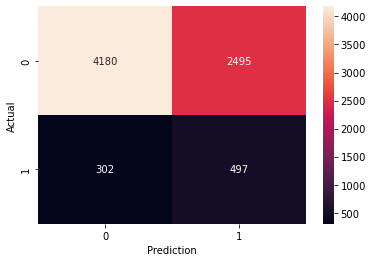

In [66]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [67]:
# Logistic Regreession Without Hyperparameter 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75      6675
           1       0.17      0.62      0.26       799

    accuracy                           0.63      7474
   macro avg       0.55      0.62      0.51      7474
weighted avg       0.85      0.63      0.70      7474



The more important is recall feature, because the actual customer should not predicted as not customer. Contrast to not customer asummed to be customer could increase subs rate

In [68]:
# with hyper parameter
model_rs_tuned = LogisticRegression(C= 1, l1_ratio= 1, max_iter= 100, penalty= 'l1', solver= 'saga')
model_rs_tuned.fit(X_train_st, y_train_st)

LogisticRegression(C=1, l1_ratio=1, penalty='l1', solver='saga')

In [69]:
y_pred_rs_tuned = model_rs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rs_tuned))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75      6675
           1       0.17      0.62      0.26       799

    accuracy                           0.63      7474
   macro avg       0.55      0.62      0.51      7474
weighted avg       0.85      0.63      0.70      7474



In [70]:
# plot roc auc curve
def plot_roc_curve(true_y, y_prob, labels):
    
    fpr,tpr,thresholds = roc_curve(true_y, y_prob)
    
    sns.lineplot(fpr, tpr, label=labels)
    plt.xlabel('false positive rate')
    plt.ylabel('false negative rate')

\model auc score:0.6246732573019645



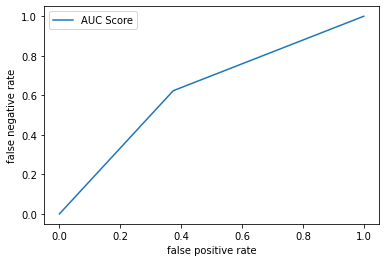

In [71]:
plot_roc_curve(y_test, y_pred_rs_tuned, 'AUC Score')
print(f'\model auc score:{roc_auc_score(y_test, y_pred_rs_tuned)}\n')

# Decision Tree Model

In [72]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz

In [73]:
model = DecisionTreeClassifier(splitter="best", max_depth=100, criterion="gini")
model.fit(X_train_st, y_train_st)

DecisionTreeClassifier(max_depth=100)

In [74]:
# buat y predict
y_pred = model.predict(X_test)

In [75]:
# buat df untuk stare hasil actual vs pred 
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [76]:
# cek hasil
result

,y_act,y_pred
35455,0,0
7367,0,1
194,0,1
6864,0,0
35782,0,0
...,...,...
25539,0,0
39069,0,1
27585,0,0
10893,0,0


In [77]:
# buat kolom untuk nama feature dalam visualisasi
DT_cols = X_train_st.columns.tolist()

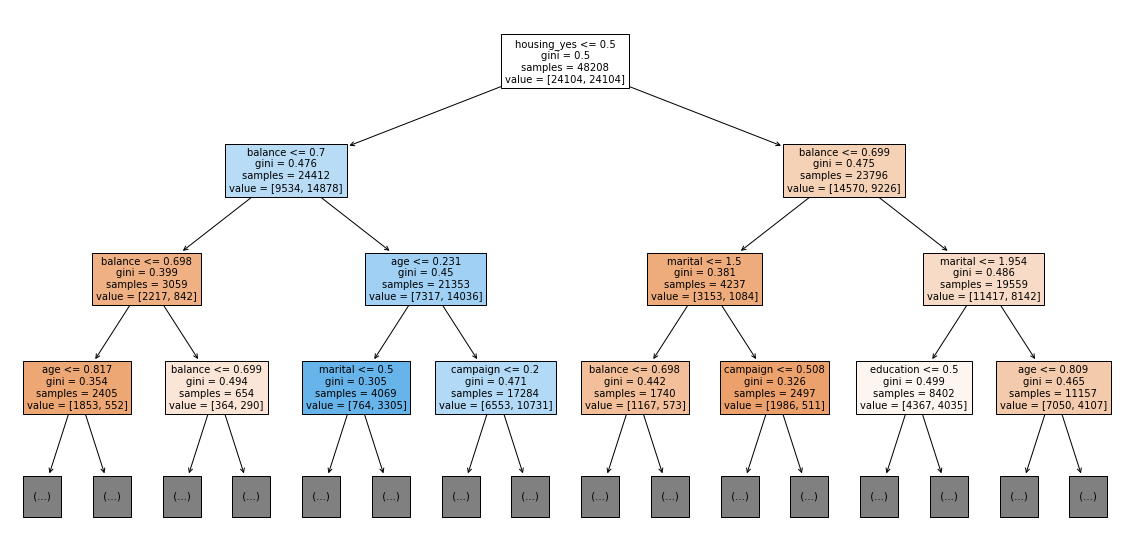

In [78]:
# plot decision tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names = DT_cols, impurity = True,
          fontsize = 10, max_depth = 3,
          filled = True)
# plt.savefig('dt_viz', dpi=100)
plt.show()

In [81]:
# Descision Tree Model Without HyperParameter
model_dt = DecisionTreeClassifier().fit(X_train_st, y_train_st)
y_pred_dt= model_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87      6675
           1       0.19      0.34      0.24       799

    accuracy                           0.77      7474
   macro avg       0.55      0.58      0.55      7474
weighted avg       0.84      0.77      0.80      7474



In [82]:
# Decision Tree With HyperParameter
model_dt_tuned = DecisionTreeClassifier(splitter="best", max_depth=100, criterion="gini").fit(X_train_st, y_train_st)

In [83]:
y_pred_dt_tuned = model_dt_tuned.predict(X_test)
print(classification_report(y_test, y_pred_dt_tuned))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87      6675
           1       0.19      0.34      0.24       799

    accuracy                           0.77      7474
   macro avg       0.55      0.58      0.55      7474
weighted avg       0.83      0.77      0.80      7474



# Ensemble Model

## RandomForestClassifier

In [84]:
# RFC with defaut Parameter
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train_st, y_train_st)

RandomForestClassifier()

In [85]:
y_pred_rfc = model_rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      6675
           1       0.20      0.35      0.25       799

    accuracy                           0.78      7474
   macro avg       0.56      0.59      0.56      7474
weighted avg       0.84      0.78      0.80      7474



In [ ]:
# RFC with Hyper Parameter

In [86]:
model_rfc_tuned = RandomForestClassifier(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 2, max_depth = 40)
model_rfc_tuned.fit(X_train_st, y_train_st)

RandomForestClassifier(max_depth=40, min_samples_leaf=2, n_estimators=500)

In [87]:
y_pred_rfc_tuned = model_rfc_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rfc_tuned))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      6675
           1       0.21      0.38      0.27       799

    accuracy                           0.78      7474
   macro avg       0.56      0.60      0.57      7474
weighted avg       0.84      0.78      0.81      7474



\model auc score:0.6037958496810151



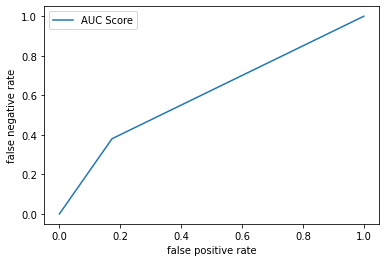

In [88]:
plot_roc_curve(y_test, y_pred_rfc_tuned, 'AUC Score')
print(f'\model auc score:{roc_auc_score(y_test, y_pred_rfc_tuned)}\n')

## XGBClassifier

In [89]:
# XGB Classifier with Default Parameter

In [92]:
from xgboost import XGBClassifier

model_xgc = XGBClassifier().fit(X_train_st, y_train_st)
y_pred_xgc = model_xgc.predict(X_test)
print(classification_report(y_test, y_pred_xgc))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6675
           1       0.29      0.26      0.27       799

    accuracy                           0.85      7474
   macro avg       0.60      0.59      0.60      7474
weighted avg       0.85      0.85      0.85      7474



In [91]:
model_xgc_tuned = XGBClassifier(reg_lambda = 1, reg_alpha = 40, n_estimators = 200, max_depth = 10, gamma = 2, colsample_bytree=1, min_child_weight =10)
model_xgc_tuned.fit(X_train_st, y_train_st)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [93]:
#XGBClassifier with HyperParameter

In [94]:
y_pred_xgc_tuned = model_xgc_tuned.predict(X_test)
print(classification_report(y_test, y_pred_xgc_tuned))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6675
           1       0.27      0.38      0.32       799

    accuracy                           0.82      7474
   macro avg       0.60      0.63      0.61      7474
weighted avg       0.85      0.82      0.84      7474



\model auc score:0.6288894826398167



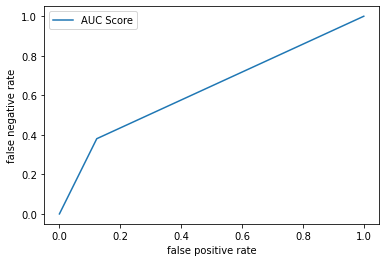

In [95]:
plot_roc_curve(y_test, y_pred_xgc_tuned, 'AUC Score')
print(f'\model auc score:{roc_auc_score(y_test, y_pred_xgc_tuned)}\n')


model AUC score (XGC) : 0.6288894826398167 -- Recall: 0.3804755944931164--F1 Score: 0.3163371488033299

model AUC score (LogisticReg) : 0.6246732573019645-- Recall: 0.623279098873592--F1 Score: 0.2625889796994464

model AUC score (RFC) : 0.6037958496810151-- Recall: 0.3804755944931164--F1 Score: 0.2693841382365973

model AUC score (DecisionTree) : 0.5806465947603042-- Recall: 0.3379224030037547--F1 Score: 0.24021352313167257



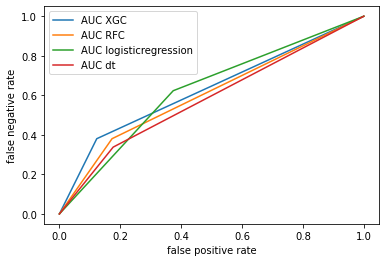

In [96]:
# plot roc auc
plot_roc_curve(y_test, y_pred_xgc_tuned, "AUC XGC")
plot_roc_curve(y_test, y_pred_rfc_tuned, "AUC RFC")
plot_roc_curve(y_test, y_pred_rs_tuned, "AUC logisticregression")
plot_roc_curve(y_test, y_pred_dt_tuned, "AUC dt")
print(f"\nmodel AUC score (XGC) : {roc_auc_score(y_test, y_pred_xgc_tuned)} -- Recall: {recall_score(y_test, y_pred_xgc_tuned)}--F1 Score: {f1_score(y_test, y_pred_xgc_tuned)}")
print(f"\nmodel AUC score (LogisticReg) : {roc_auc_score(y_test, y_pred_rs_tuned)}-- Recall: {recall_score(y_test, y_pred_rs_tuned)}--F1 Score: {f1_score(y_test, y_pred_rs_tuned)}")
print(f"\nmodel AUC score (RFC) : {roc_auc_score(y_test, y_pred_rfc_tuned)}-- Recall: {recall_score(y_test, y_pred_rfc_tuned)}--F1 Score: {f1_score(y_test, y_pred_rfc_tuned)}")
print(f"\nmodel AUC score (DecisionTree) : {roc_auc_score(y_test, y_pred_dt_tuned)}-- Recall: {recall_score(y_test, y_pred_dt_tuned)}--F1 Score: {f1_score(y_test, y_pred_dt_tuned)}\n")
plt.show()

rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Our model results for the training and test data which focused on recall score suggest logisticregression model is the best to use to maximize recall score with recall_score 0.632 and AUC_Score = 0.6265. Other models perform similar results with recall score around 0.39 and auc score of 0.6 

# Summary

>Clients who have subscribed concentrated in 30-50 years old range, with balance lower than 10000 and mostly have secondary education, and single.

> asumming recall, to be not a problem, because not customer predicted as customer could increase subscription and pres

> The logisticregression model has the highest recall score among other models with recall_score of 0.632 and false negative as low as 0.17 and AUC Score of 0.625. 

> Descision tree model, random foresrclassification, and xgbclassification perform similar results before or after hyper parameter tuning
